In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt

In [2]:
#!pip install pandas_datareader

In [3]:
from pandas_datareader import wb

In [4]:
matches = wb.search('gdp.*capita.*const')
matches

,id,name,unit,source,sourceNote,sourceOrganization,topics
691,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
11028,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
11030,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
11032,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2021 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth
11033,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


In [5]:
matches[matches['sourceNote'].str.contains("energy")]

,id,name,unit,source,sourceNote,sourceOrganization,topics


In [6]:
matches[matches['source'] == "World Development Indicators"].sort_values("topics")

,id,name,unit,source,sourceNote,sourceOrganization,topics
11028,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
11030,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
11032,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2021 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth


In [7]:
country_wiki = pd.read_html("https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes")[0]
country_wiki

ISO 3166[1] name[5]                       Official state name[6][a]  \
     ISO 3166[1] name[5]                       Official state name[6][a]   
0            Afghanistan          the Islamic Republic of Afghanistan[b]   
1          Åland Islands                                     Åland[c][d]   
2                Albania                         the Republic of Albania   
3                Algeria     the People's Democratic Republic of Algeria   
4         American Samoa                               American Samoa[c]   
..                   ...                                             ...   
266    Wallis and Futuna  the Territory of the Wallis and Futuna Islands   
267  Western Sahara [an]      the Sahrawi Arab Democratic Republic[c][d]   
268                Yemen                           the Republic of Yemen   
269               Zambia                          the Republic of Zambia   
270             Zimbabwe                        the Republic of Zimbabwe   

    Sovereignty [6][7][8] ISO 3166-1[2]                   \
    Sovereignty [6][7][8]       A-2 [5] A-3 [5] Num. [5]   
0               UN member            AF     AFG      004   
1                 Finland            AX     ALA      248   
2               UN member            AL     ALB      008   
3               UN member            DZ     DZA      012   
4           United States            AS     ASM      016   
..                    ...           ...     ...      ...   
266                France            WF     WLF      876   
267         Disputed [ao]            EH     ESH      732   
268             UN member            YE     YEM      887   
269             UN member            ZM     ZMB      894   
270             UN member            ZW     ZWE      716   

    ISO 3166-2[3] subdivision codes link TLD [9]  
    ISO 3166-2[3] subdivision codes link TLD [9]  
0                          ISO 3166-2:AF     .af  
1                          ISO 3166-2:AX     .ax  
2                          ISO 3166-2:AL     .al  
3                          ISO 3166-2:DZ     .dz  
4                          ISO 3166-2:AS     .as  
..                                   ...     ...  
266                        ISO 3166-2:WF     .wf  
267                        ISO 3166-2:EH    [ap]  
268                        ISO 3166-2:YE     .ye  
269                        ISO 3166-2:ZM     .zm  
270                        ISO 3166-2:ZW     .zw  

[271 rows x 8 columns]

In [8]:
country_wiki.columns

MultiIndex([(                 'ISO 3166[1] name[5]', ...),
            (           'Official state name[6][a]', ...),
            (               'Sovereignty [6][7][8]', ...),
            (                       'ISO 3166-1[2]', ...),
            (                       'ISO 3166-1[2]', ...),
            (                       'ISO 3166-1[2]', ...),
            ('ISO 3166-2[3] subdivision codes link', ...),
            (                             'TLD [9]', ...)],
           )

In [9]:
cols = country_wiki.columns.get_level_values(1)
cols

Index(['ISO 3166[1] name[5]', 'Official state name[6][a]',
       'Sovereignty [6][7][8]', 'A-2 [5]', 'A-3 [5]', 'Num. [5]',
       'ISO 3166-2[3] subdivision codes link', 'TLD [9]'],
      dtype='object')

In [10]:
country_wiki.columns = cols
country_wiki.tail()

,ISO 3166[1] name[5],Official state name[6][a],Sovereignty [6][7][8],A-2 [5],A-3 [5],Num. [5],ISO 3166-2[3] subdivision codes link,TLD [9]
266,Wallis and Futuna,the Territory of the Wallis and Futuna Islands,France,WF,WLF,876,ISO 3166-2:WF,.wf
267,Western Sahara [an],the Sahrawi Arab Democratic Republic[c][d],Disputed [ao],EH,ESH,732,ISO 3166-2:EH,[ap]
268,Yemen,the Republic of Yemen,UN member,YE,YEM,887,ISO 3166-2:YE,.ye
269,Zambia,the Republic of Zambia,UN member,ZM,ZMB,894,ISO 3166-2:ZM,.zm
270,Zimbabwe,the Republic of Zimbabwe,UN member,ZW,ZWE,716,ISO 3166-2:ZW,.zw


In [11]:
dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'GB', 'JP'], start=2005, end=2018)

/tmp/ipykernel_1976/3129800151.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'GB', 'JP'], start=2005, end=2018)


In [12]:
type(dat)

pandas.core.frame.DataFrame

In [13]:
dat.head()

NY.GDP.PCAP.KD
country        year                
United Kingdom 2018    46740.553593
               2017    46373.638531
               2016    45482.178289
               2015    44964.391144
               2014    44337.678640

In [14]:
df = dat.reset_index()
df.head()

,country,year,NY.GDP.PCAP.KD
0,United Kingdom,2018,46740.553593
1,United Kingdom,2017,46373.638531
2,United Kingdom,2016,45482.178289
3,United Kingdom,2015,44964.391144
4,United Kingdom,2014,44337.678640


In [15]:
xf = df.pivot(index = 'year', columns = 'country', values = 'NY.GDP.PCAP.KD')
xf

country,Japan,United Kingdom,United States
year,,,
2005,33098.547466,43007.362925,52649.571305
2006,33531.518563,43711.155017,53596.315237
2007,33990.036034,44508.605795,54152.829265
2008,33557.645404,44060.003098,53703.962896
2009,31651.083774,41709.966168,51863.618341
2010,32942.202078,42310.749913,52821.404764
2011,33011.134230,42462.106735,53259.255214
2012,33518.444937,42805.842517,54080.228650
2013,34239.886247,43282.209751,54844.242580


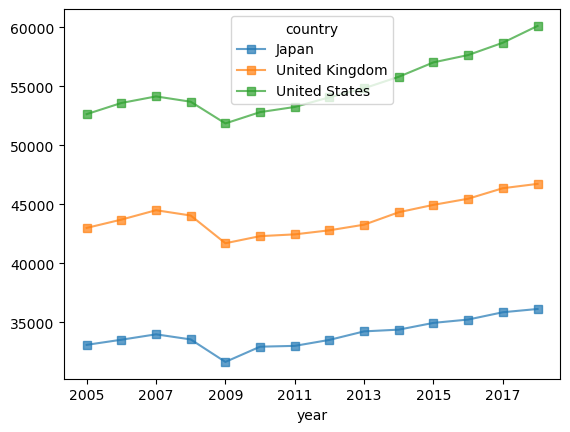

In [16]:
xf.plot(marker='s', alpha=.7,);

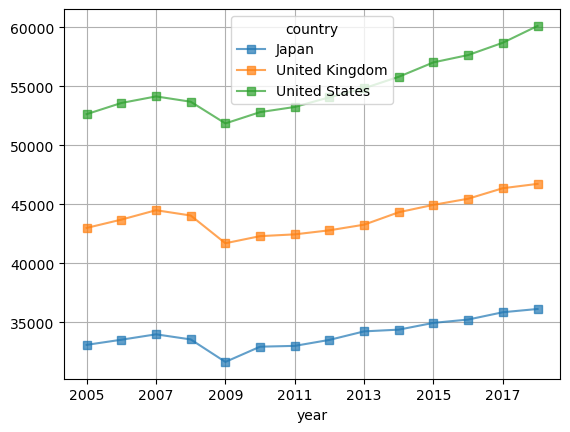

In [17]:
xf.plot(marker='s', alpha=.7, grid=True,);

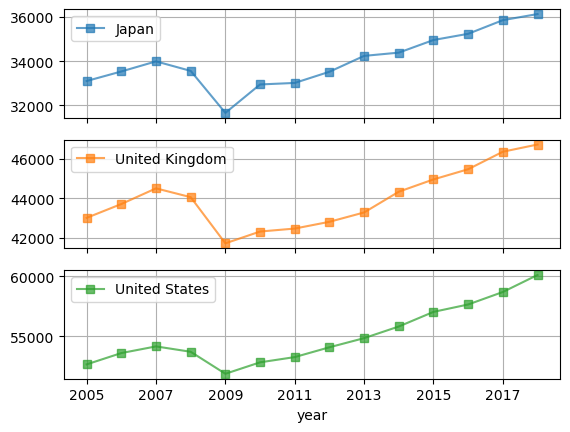

In [18]:
xf.plot(marker='s', alpha=.7, grid=True, subplots=True,);

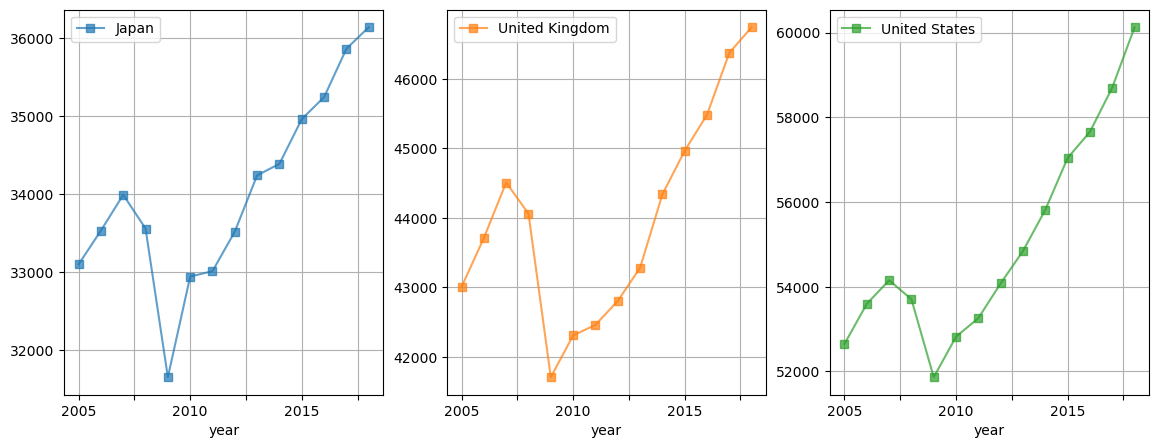

In [19]:
xf.plot(marker='s', alpha=.7, grid=True, subplots=True, layout=(1,3), figsize=(14, 5));

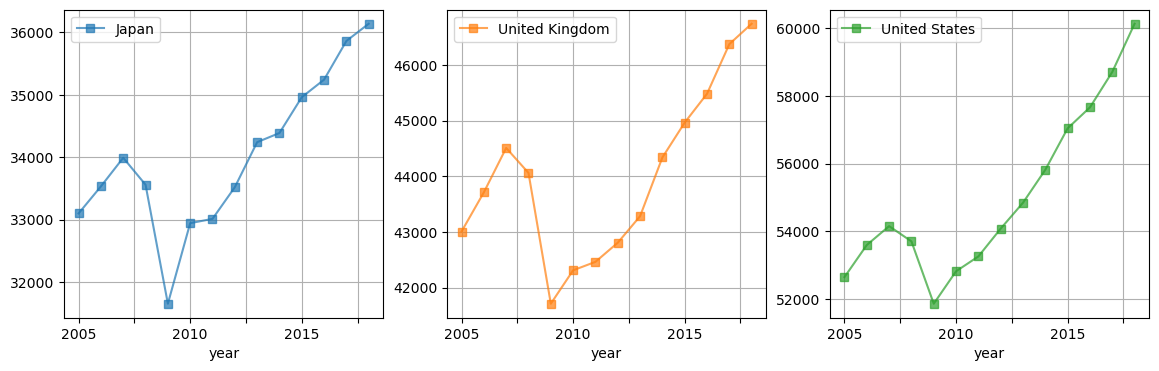

In [20]:
xf.plot(marker='s', alpha=.7, grid=True, subplots=True, layout=(1,3), figsize=(14,4));

In [21]:
for idx, col in xf.items():
    print(idx, col, "\n")

Japan year
2005    33098.547466
2006    33531.518563
2007    33990.036034
2008    33557.645404
2009    31651.083774
2010    32942.202078
2011    33011.134230
2012    33518.444937
2013    34239.886247
2014    34386.905855
2015    34960.639384
2016    35242.199377
2017    35861.972855
2018    36138.529082
Name: Japan, dtype: float64 

United Kingdom year
2005    43007.362925
2006    43711.155017
2007    44508.605795
2008    44060.003098
2009    41709.966168
2010    42310.749913
2011    42462.106735
2012    42805.842517
2013    43282.209751
2014    44337.678640
2015    44964.391144
2016    45482.178289
2017    46373.638531
2018    46740.553593
Name: United Kingdom, dtype: float64 

United States year
2005    52649.571305
2006    53596.315237
2007    54152.829265
2008    53703.962896
2009    51863.618341
2010    52821.404764
2011    53259.255214
2012    54080.228650
2013    54844.242580
2014    55817.563247
2015    57040.208214
2016    57658.670883
2017    58703.144078
2018    60127.210278

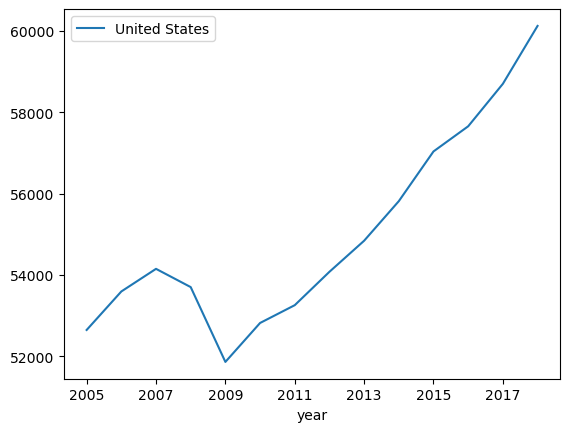

In [22]:
for idx, col in xf.items():
    if col.mean() > 45000:
        col.plot(label=idx)
        plt.legend()